# Social Media Content Analysis

I analyzed the performance of social media posts by content categories and social media platforms (Facebook, Instagram, Twitter, and LinkedIn) to identify the most optimal platform to communicate a company's value propositions. 

The analysis relived that not only the posts about the company's core values were underperforming compared to other content categories but also the value of posts the core values was much smaller. This result led me to focus on reinforcing the brand messaging as one of the strategic plans. 

## Background
My social media team's goal was to communicate the company's value propositions in engaging ways while maximizing the exposure (=impressions) of individual posts. In order to acquire high impressions (due to most of the social media's algorithms), constantly posting highly engaging content is essential. However, the company's core values are not necessarily "fun" topics to discuss, and it's tempting to just post engagement-driven posts such as memes and pretty images.

The social media team used to post the exact same content across 4 major social media channels (Facebook, LinkedIn, Instagram, and Twitter). However, as each platform has a different audience, it is required to create content that caters to each platform.


## Objective
Identify the most optimal platform(s) for each core value. 


## Measure of Success

- Engagement rate (# of post engagement / # of impression) *– Engagement is user' behaivors such as "Like", "Comments", and "Share". Higher the engagement rate, the higher the quality of content is.
- The number of posts
- The number of impression *– This indicate how much a single social media post is shown on user's timeline. This is usually used as an indirect measure of brand awareness*

## Data Source
The raw data of social media posts published between the past 12 months (January 1, 2020, December 21, 2020) were exported from a social media management platform, Sprout Social as `.csv`.

Each post has a few tags representing the content categories and subcategories. Content categories are consist of company's core values, values, and social media-specific content categories (such as memes, or user generated content). Subcategories are used to label campaigns, experimental posts, and types of products.

For confidentiality, any information that can identify the company was scraped out for this case study. Content categories and subcategories are modified as below:

- Company's core values: core value 1, core value 2, core value 3
- Company's values: value, 4, value 5, value 6
- Social media specific categories: corgi, husky
- Subcategories: Pokemon names


## Results
- All three core values (core value 1, core value 2, core value 3) were not performing well across the platforms. Also, the number of posts about these core values is fewer than the other categories. 
- The number of posts is heavily skewed to the "value 4" category on social media, and the category is performing well. 
- The "value 5" content generates the highest engagement on LinkedIn while the category does not perform as much on other platforms. 
- The "value 6" content performs well on all channels except Facebook. 
 - The engagement of the "value 4" category on Facebook is higher than other content categories. However, the impression is not necessarily higher, which implies there might not be a strong correlation between post engagements and impression on Facebook.
 
## Insights
Core values are not necessarily easy topics to cover on social media and making the topic engaging requires creativity. My assumption was the team did not fully understand the company's values and how to talk about them. That's why they tried to avoid the topic. Instead, they posted value 4 content because it's an "easy win". 


## Action items
- As the low performance of content about the three core values is a critical issue, reinforce the brand messaging to communicate core values by providing the social media team with brand training.
- Continue to produce the "value 4" content as it helps maintain the social media accounts' engagement.
- Post more of the "value 5" content on LinkedIn.
- Reduce the amount of the "value 6" content on Facebook. 
- Explore new ways to improve Facebook's organic impression since there is little correlation between post engagements and impressions. The basic strategy for social media is to improve engagement, which also helps organic impressions, but Facebook needs a different strategy.


## Limitation and future project
The social media team had to manually tag the content type, which was extremely time-consuming. Also, tagging can be subjective without a clear guideline. This process could be improved by using NLP.

In [1]:

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 999) #This option force Jupyternotebook to show all columns. 

In [2]:
cols_to_use =['Date', 'Post ID', 'Network','Post Type','Impressions',
       'Organic Impressions', 'Engagement Rate (per Impression)',
       'Engagements', 'Reactions', 'Comments',
       'Shares','Tags']
post_raw = pd.read_csv('Projects/Social Media Content Analysis/modifiled_post_performance_data.csv', parse_dates=['Date'], usecols=cols_to_use)

In [3]:
#Pull only "Post" type data
post_type_to_keep = (post_raw['Post Type'] == 'Post')| (post_raw['Post Type'] == 'Tweet')
post_raw = post_raw[post_type_to_keep]
#fill na with 0
post_raw = post_raw.fillna(0)

In [4]:
post_raw.head(5)

,Date,Post ID,Network,Post Type,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Comments,Shares,Tags
0,2020-05-11 08:53:00,6.67E+18,LinkedIn,Post,72,0,-15.30%,-11,-11,0.0,0.0,"Weedle, Pidgeotto"
1,2020-05-11 08:52:00,6.67E+18,LinkedIn,Post,68,0,-14.70%,-10,-9,0.0,-1.0,"Weedle, Pidgeotto"
2,2020-05-29 10:19:00,1.27E+18,Twitter,Tweet,243,0,0%,0,0,0.0,0.0,"Wartortle, Value 4"
3,2020-05-04 21:56:00,1.26E+18,Twitter,Tweet,"1,274",0,0%,0,0,0.0,0.0,"Wartortle, Core value 3, PidgeotMega Pidgeot"
4,2020-04-03 13:36:00,1.25E+18,Twitter,Tweet,852,0,0%,0,0,0.0,0.0,"CharizardMega Charizard X, Value 4, Value 4, M..."


In [5]:
post_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1737 entries, 0 to 1736
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              1737 non-null   datetime64[ns]
 1   Post ID                           1737 non-null   object        
 2   Network                           1737 non-null   object        
 3   Post Type                         1737 non-null   object        
 4   Impressions                       1737 non-null   object        
 5   Organic Impressions               1737 non-null   object        
 6   Engagement Rate (per Impression)  1737 non-null   object        
 7   Engagements                       1737 non-null   object        
 8   Reactions                         1737 non-null   object        
 9   Comments                          1737 non-null   float64       
 10  Shares                            1737 non-null 

In [6]:
# A function to change dtype of engagement and impression to int64 if their dtype if object
def change_dtype(platform):
    if platform["Engagements"].dtype == "object":
        platform['Engagements'] = platform['Engagements'].str.replace(",","")
        platform['Engagements'] = platform['Engagements'].fillna(0)
        platform['Engagements'] = platform['Engagements'].astype('int64')
    
    if platform['Impressions'].dtype == "object":
        platform['Impressions'] = platform['Impressions'].str.replace(",","")
        platform['Impressions'] = platform['Impressions'].fillna(0)
        platform['Impressions'] = platform['Impressions'].astype('int64')

#A function to calculate engagement rate
def engagement_calculator(platform):
    platform['Engagement Rate'] = platform['Engagements']/platform['Impressions']

    data_to_check = ['Date', 'Network','Impressions', 'Engagements','Post ID', 'Engagement Rate']
    platform['Engagement Rate'].replace(np.inf, np.nan, inplace = True)
    platform.dropna(subset=data_to_check, inplace=True)

In [7]:
#A function to clean data by network except facebook

def clean_data_by_network(network, data):
    network = data[data['Network']==network]
    network = network[['Date', 'Network','Impressions', 'Engagements', 'Post ID', 'Tags']]

    change_dtype(network)
    engagement_calculator(network)
    
    return network

    

In [8]:
#A function to clean facebook data

def clean_facebook_data(data):
    Facebook = data[data['Network']=='Facebook']
    Facebook = Facebook[['Date', 'Network','Organic Impressions', 'Comments', 'Shares', 'Reactions', 'Post ID', 'Tags']]

    cols_to_check_dtype = ['Organic Impressions', 'Comments', 'Shares', 'Reactions']
    
    for d in cols_to_check_dtype:
        if Facebook[d].dtype == "object":
            Facebook[d] = Facebook[d].str.replace(",","")
            Facebook[d] = Facebook[d].fillna(0)
            Facebook[d] = Facebook[d].astype('int64')
            
    
    #Conbine Reaction, Comments and Share
    Facebook['Facebook Engagements'] = Facebook['Reactions']+ Facebook['Comments']+ Facebook['Shares']
    
    #Calculate engagement rate
    Facebook['Engagement Rate'] = Facebook['Facebook Engagements']/Facebook['Organic Impressions']
    Facebook['Engagement Rate'].replace(np.inf, np.nan, inplace = True)
    
    #remove reactions, Comments, and Shares
    to_keep = ['Date', 'Network','Organic Impressions', 'Facebook Engagements','Post ID', 'Engagement Rate','Tags']
    Facebook = Facebook[to_keep]
    
    Facebook.rename(columns = {"Organic Impressions": "Impressions", "Facebook Engagements":"Engagements"}, inplace = True)
    data_to_check = ['Date', 'Network','Impressions', 'Engagements','Post ID', 'Engagement Rate']
    Facebook.dropna(inplace=True, subset=data_to_check)
    
    return Facebook
    

In [9]:
facebook_cleaned = clean_facebook_data(post_raw).copy()
twitter_cleaned = clean_data_by_network('Twitter', post_raw ).copy()
instagram_cleaned = clean_data_by_network('Instagram', post_raw ).copy()
linkedin_cleaned = clean_data_by_network('LinkedIn', post_raw ).copy()

In [10]:
#Concatinate the 4 differente DFs
Networks = [facebook_cleaned, twitter_cleaned, instagram_cleaned, linkedin_cleaned]
all_data = pd.concat(Networks)

#Rearrange the column order
all_data = all_data[['Date', 'Network', 'Impressions', 'Engagements', 'Engagement Rate', 'Post ID', 'Tags']]


In [11]:
all_data.head()

,Date,Network,Impressions,Engagements,Engagement Rate,Post ID,Tags
20,2020-03-19 08:32:00,Facebook,1733,0.0,0.000000,82777273087_10158108398363088,"Sandslash, Oddish, Value 4, Geodude"
37,2020-11-05 15:00:00,Facebook,1122,0.0,0.000000,82777273087_10158785186668088,"Core value 2, German SheBellsprouterd"
48,2020-04-01 17:53:00,Facebook,1191,11.0,0.009236,82777273087_10158160206033088,"Value 4, Meowth, Core value 3"
49,2020-04-15 15:54:00,Facebook,1771,36.0,0.020327,82777273087_10158209100833088,"Alakazam, Meowth, Core value 3"
51,2020-04-11 15:13:00,Facebook,1628,1.0,0.000614,82777273087_10158194321588088,"Mankey, Growlithe, Paras"


In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 20 to 1706
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1720 non-null   datetime64[ns]
 1   Network          1720 non-null   object        
 2   Impressions      1720 non-null   int64         
 3   Engagements      1720 non-null   float64       
 4   Engagement Rate  1720 non-null   float64       
 5   Post ID          1720 non-null   object        
 6   Tags             1720 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 107.5+ KB


## Processing Tags


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#A main function to process tag strings
def process_tags(df):
    df_tags = df.copy()
    
    #A function clean up tag strings 
    def clean_up_tags(df):
        
       # df_tags = df.dropna()  #Remove Nan because Nan considered as float
        df['Tags'] = df['Tags'].str.lower()  #format the tags data by making them lowercase
        df['Tags'] = df['Tags'].str.split(pat=', ')  #split each of strings into a list
        df = df[df['Tags'].notna()]
        return df
    df_tags = clean_up_tags(df_tags)
    #print(df_tags)
    
    
    #A function to create a list to collect all unique tags from these lists
    def collect_tags(new_df):
        tags = set(new_df['Tags'].explode().values) #Create a set to remove duplicate first
        tags = list(tags) #convert the set to list
        tags = [tag for tag in tags if str(tag)!= 'nan']
        return tags
    global tags
    tags = collect_tags(df_tags)
    #print(tags)


    #A function to create a new boolean colum for each tag
    def create_tag_cols(new_df, tag_list):
        for tag in tag_list:
            new_df[tag] = [tag in new_df['Tags'].loc[i] for i in new_df.index]
        return new_df
    df_tags = create_tag_cols(df_tags, tags)
    

    #A function to create a new df to store data by category
    def create_category_df(df_tags, tags):

        #Creating a list of the number of tags used
        num_of_post = []
        for cat in tags:
            num_of_post.append(df_tags[cat].values.sum())

        data = {'Category': tags, 'Number of posts': num_of_post,}
        cat_df = pd.DataFrame(data)
        cat_df = cat_df.set_index('Category')
        cat_df['Impressions']= np.nan
        cat_df['Engagements']= np.nan  

        #A function to extract key metrics from df_tags
        metrics_to_use = ['Impressions','Engagements']
        def get_metrics(metrics_list):
            for cat in tags:
                for metric in metrics_list:
                    cat_df.loc[cat, metric] = df_tags[df_tags[cat]==1][metric].sum()
            return cat_df

        cat_df = get_metrics(metrics_to_use)

        #function to calculate engagement rate
        def get_engagement_rage(category_df):
            category_df['Engagement Rate']=category_df['Engagements']/category_df['Impressions']
            category_df['Average Engagement']=category_df['Engagements']/category_df['Number of posts']
            category_df['Average Impression']=category_df['Impressions']/category_df['Number of posts']
            category_df = category_df.round(2)
            category_df.sort_values(by='Engagement Rate', inplace = True, ascending=False)
            category_df.reset_index(inplace = True)
            return category_df

        cat_df = get_engagement_rage(cat_df)
        return cat_df
    cat_df = create_category_df(df_tags, tags)
    
    return cat_df
 


In [15]:
content_category_df = process_tags(all_data)
content_category_df.head()

,Category,Number of posts,Impressions,Engagements,Engagement Rate,Average Engagement,Average Impression
0,sandshrew,3,9392.0,893.0,0.10,297.67,3130.67
1,blastoisemega blastoise,10,22244.0,2127.0,0.10,212.70,2224.40
2,golem,40,140756.0,11247.0,0.08,281.18,3518.90
3,nidoran♀,8,62705.0,4873.0,0.08,609.12,7838.12
4,beedrclefable,4,11104.0,758.0,0.07,189.50,2776.00


In [16]:
def export_tag_report(data, MMYY):
    filename = f"content_category_report_{MMYY}.csv"
    data.to_csv('filename')

In [17]:
export_tag_report(content_category_df, "2020")

## DataFrame by platforms
#### DATA TO USE
`twitter_cleaned`
`facebook_cleaned`
`instagram_cleaned`
`linkedin_cleaned`

In [18]:
twitter = process_tags(twitter_cleaned)
facebook = process_tags(facebook_cleaned)
instagram = process_tags(instagram_cleaned)
linkedin = process_tags(linkedin_cleaned)

In [19]:
twitter.describe()

,Number of posts,Impressions,Engagements,Engagement Rate,Average Engagement,Average Impression
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,15.351064,23297.851064,341.468085,0.014787,25.255106,1805.948085
std,21.544506,31026.303726,504.274582,0.010025,28.046034,2594.600059
min,1.000000,981.000000,4.000000,0.000000,4.000000,690.000000
25%,2.000000,3129.000000,34.500000,0.010000,12.717500,1289.275000
50%,6.000000,9100.000000,121.000000,0.010000,18.145000,1498.415000
75%,21.250000,34687.000000,498.750000,0.020000,27.522500,1697.842500
max,111.000000,158213.000000,2674.000000,0.060000,203.500000,26314.000000


## Creating Subsettings for content types

In [20]:
tags

['machop',
 'beedrill',
 'metapod',
 'venusaur',
 'value 7 corgi',
 'golbat',
 'metapodmencement',
 'blastoise',
 'tentacool',
 'sandslash',
 'tentacruel',
 'golduck',
 'nidoran♀',
 'ponyta',
 'psyduck',
 'venomoth',
 'blastoisemega blastoise',
 'spikachuing start',
 'dugtrio',
 'pidgeot',
 'nidoqueen',
 'oddish',
 'primeape',
 'charizardmega charizard x',
 'weepinbell',
 'poliwag',
 'clefable',
 'abra',
 'persian',
 'spearow',
 'cleponytable',
 'machamp',
 'alakazammega alakazam',
 'parasect',
 'golem',
 'value 6',
 'value 4',
 'german shebellsprouterd',
 'venonat',
 'charmander',
 'venusaurmega venusaur',
 'paras',
 'core value 2',
 'alakazam',
 'core value 3',
 'arcanine',
 'beedrclefable',
 'bellsprout',
 'kakuna',
 'fearow',
 'value 5',
 'nidoran♂',
 'geodude',
 'husky',
 'vulpix',
 'rattata',
 'mankey',
 'meowth',
 'pidgeotmega pidgeot',
 'weedle',
 'wartortle',
 'clefairy',
 'growlithe',
 'pidgeotto',
 'squirtle',
 'poliwhirl',
 'ekans',
 'core value 1',
 'raticate',
 'value 7',

In [21]:
#Creating a list of primary content (Value propositions + social media origianl categorids)
primary_content= ['core value 1', 'value 4','value 5', 'core value 2','value 6','core value 3','corgi','husky','value 7', 'german shepherd']

In [22]:
content_category_df["Category"].unique()

array(['sandshrew', 'blastoisemega blastoise', 'golem', 'nidoran♀',
       'beedrclefable', 'victreebel', 'bellsprout', 'venonat', 'nidorino',
       'value 7 corgi', 'machoke', 'german shebellsprouterd', 'raichu',
       'golbat', 'vileplume', 'nidoking', 'rattata', 'primeape',
       'nidoqueen', 'poliwag', 'value 6', 'arcanine', 'ekans', 'nidoran♂',
       'metapodmencement', 'ninetales', 'husky', 'value 5', 'pikachu',
       'fearow', 'parasect', 'clefable', 'graveler', 'psyduck',
       'tentacruel', 'charmeleon', 'alakazam', 'blastoise', 'abra',
       'mankey', 'pidgeotto', 'butterfree', 'corgi', 'ponyta', 'golduck',
       'charizardmega charizard y', 'clefairy', 'diglett', 'squirtle',
       'kakuna', 'weedle', 'value 4', 'beedrill', 'wartortle', 'persian',
       'poliwhirl', 'core value 1', 'vulpix', 'venomoth', 'sandslash',
       'venusaur', 'growlithe', 'meowth', 'ivysaur', 'core value 3',
       'pidgeotmega pidgeot', 'venusaurmega venusaur', 'oddish',
       'weepinbell

In [23]:
#subsetting primary content category only
performance_by_primary = content_category_df[content_category_df['Category'].isin(primary_content)]
performance_by_primary

,Category,Number of posts,Impressions,Engagements,Engagement Rate,Average Engagement,Average Impression
20,value 6,70,240629.0,11550.0,0.05,165.00,3437.56
26,husky,120,399233.0,21505.0,0.05,179.21,3326.94
27,value 5,62,167674.0,7737.0,0.05,124.79,2704.42
42,corgi,95,204093.0,7659.0,0.04,80.62,2148.35
51,value 4,379,1071432.0,42079.0,0.04,111.03,2827.00
56,core value 1,144,311899.0,10194.0,0.03,70.79,2165.97
64,core value 3,172,430546.0,12797.0,0.03,74.40,2503.17
74,core value 2,97,213664.0,4656.0,0.02,48.00,2202.72
76,value 7,21,50324.0,1004.0,0.02,47.81,2396.38


In [24]:
#subsetting school only
#performance_by_school = content_category_df[content_category_df['Category'].isin(schools)]
#performance_by_school.head()

In [25]:
#subsetting other content type only
#criteria = ~content_category_df['Category'].isin(schools) | ~content_category_df['Category'].isin(performance_by_primary)
#performance_by_secondary = content_category_df[criteria]
#performance_by_secondary.head()

## Visualizayion: Primary Content Category

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline  

import seaborn as sns

In [27]:
#Create color pallet for each category

colors = {'core value 1':'red', 'value 4':'darkorange','value 5':'gold', 'core value 2':'yellow', 'value 6':'yellowgreen', 'core value 3':'green','corgi':'teal','husky':'skyblue','value 7':'blue', 'german shepherd':'pink'}


In [28]:
#aggregate the category performance using pivot_table
agg_perimary_category = pd.pivot_table(performance_by_primary, index=['Category'], values=['Number of posts', 'Impressions', 'Engagements', 'Engagement Rate', 'Average Engagement', 'Average Impression'], aggfunc={'Number of posts':np.sum, 'Impressions':np.mean, 'Engagements':np.mean, 'Engagement Rate':np.mean, 'Average Impression':np.mean, 'Average Engagement':np.mean})
agg_perimary_category = agg_perimary_category.reset_index()


agg_perimary_category['color']= agg_perimary_category['Category'].apply(lambda x: colors[x])
agg_perimary_category

,Category,Average Engagement,Average Impression,Engagement Rate,Engagements,Impressions,Number of posts,color
0,core value 1,70.79,2165.97,0.03,10194.0,311899.0,144,red
1,core value 2,48.00,2202.72,0.02,4656.0,213664.0,97,yellow
2,core value 3,74.40,2503.17,0.03,12797.0,430546.0,172,green
3,corgi,80.62,2148.35,0.04,7659.0,204093.0,95,teal
4,husky,179.21,3326.94,0.05,21505.0,399233.0,120,skyblue
5,value 4,111.03,2827.00,0.04,42079.0,1071432.0,379,darkorange
6,value 5,124.79,2704.42,0.05,7737.0,167674.0,62,gold
7,value 6,165.00,3437.56,0.05,11550.0,240629.0,70,yellowgreen
8,value 7,47.81,2396.38,0.02,1004.0,50324.0,21,blue


### Performance by Platform

In [29]:
twitter_primary = twitter[twitter['Category'].isin(primary_content)].reset_index(drop=True)
twitter_primary['color']=twitter_primary['Category'].apply(lambda x: colors[x])

facebook_primary = facebook[facebook['Category'].isin(primary_content)].reset_index(drop=True)
facebook_primary['color']=facebook_primary['Category'].apply(lambda x: colors[x])

instagram_primary = instagram[instagram['Category'].isin(primary_content)].reset_index(drop=True)
instagram_primary['color']=instagram_primary['Category'].apply(lambda x: colors[x])

linkedin_primary = linkedin[linkedin['Category'].isin(primary_content)].reset_index(drop=True)
linkedin_primary['color']=linkedin_primary['Category'].apply(lambda x: colors[x])

In [30]:
twitter_primary

,Category,Number of posts,Impressions,Engagements,Engagement Rate,Average Engagement,Average Impression,color
0,husky,48,72933.0,2205.0,0.03,45.94,1519.44,skyblue
1,value 6,22,36637.0,1056.0,0.03,48.00,1665.32,yellowgreen
2,corgi,36,51157.0,780.0,0.02,21.67,1421.03,teal
3,value 4,111,158213.0,2532.0,0.02,22.81,1425.34,darkorange
4,value 5,23,31849.0,619.0,0.02,26.91,1384.74,gold
5,core value 2,26,29687.0,451.0,0.02,17.35,1141.81,yellow
6,core value 1,49,52351.0,687.0,0.01,14.02,1068.39,red
7,core value 3,53,80468.0,897.0,0.01,16.92,1518.26,green
8,value 7,6,6982.0,100.0,0.01,16.67,1163.67,blue


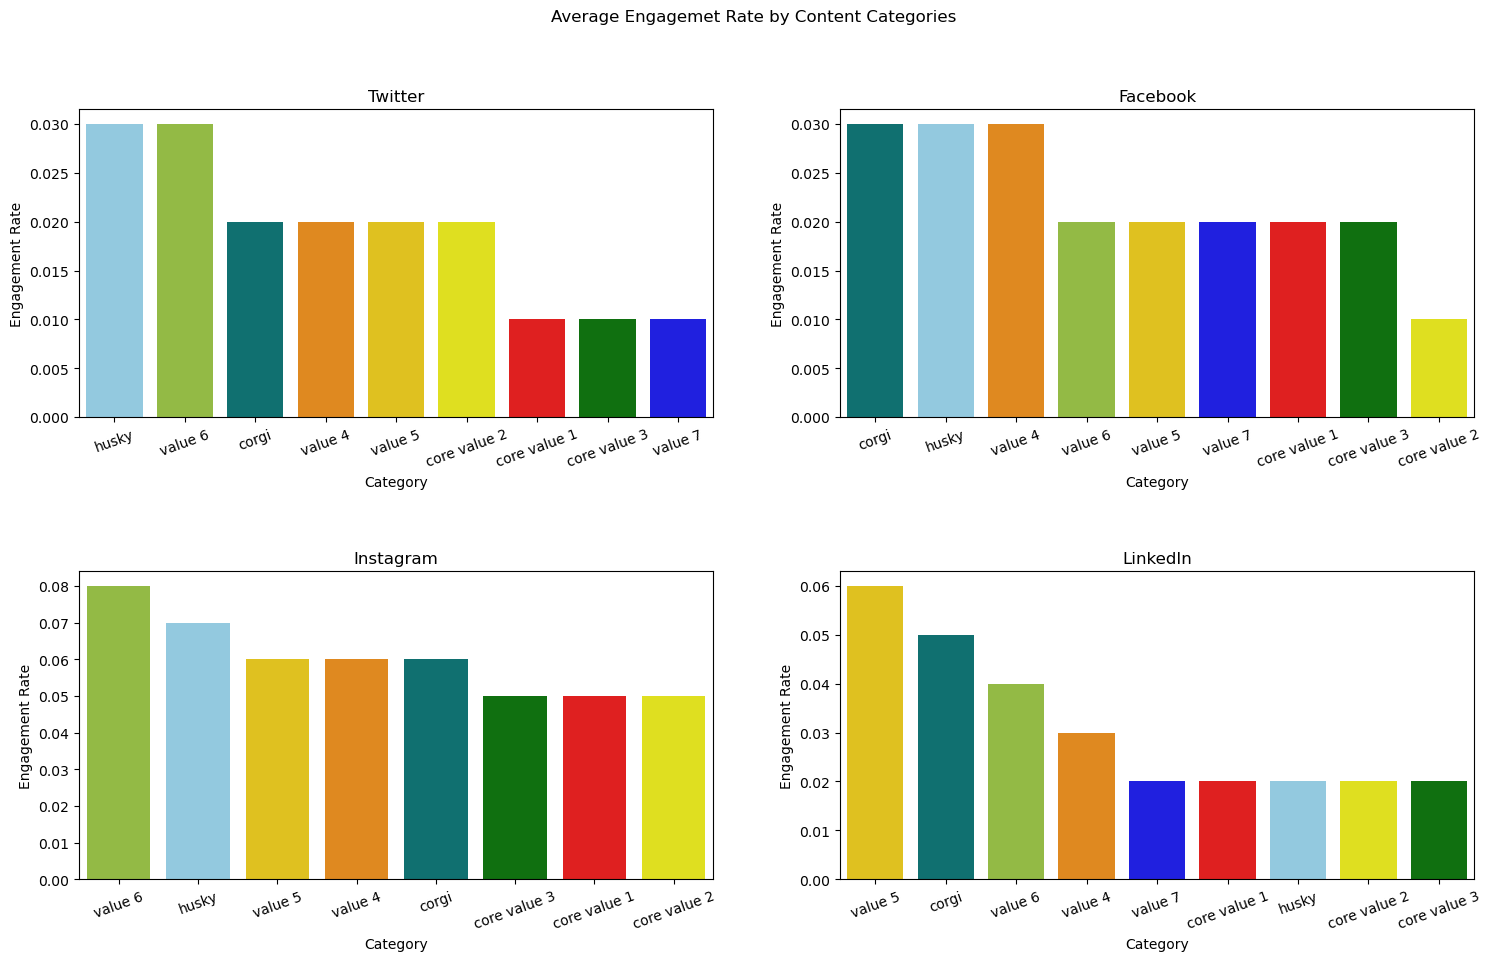

In [31]:
fig, axes = plt.subplots(2,2, figsize = (18,10))

fig.suptitle('Average Engagemet Rate by Content Categories')
fig.subplots_adjust(hspace=0.5)

#Twitter
g = sns.barplot(ax= axes[0,0], data=twitter_primary, x= 'Category', y = 'Engagement Rate', palette=twitter_primary['color'], order=twitter_primary.sort_values('Engagement Rate', ascending=False).Category)
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes[0,0].set_title('Twitter')


#Facebook
g = sns.barplot(ax= axes[0,1], data=facebook_primary, x= 'Category', y = 'Engagement Rate', palette=facebook_primary['color'],order=facebook_primary.sort_values('Engagement Rate', ascending=False).Category)
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes[0,1].set_title('Facebook')

#Instagram
g = sns.barplot(ax= axes[1,0], data=instagram_primary, x= 'Category', y = 'Engagement Rate',palette=instagram_primary['color'],order=instagram_primary.sort_values('Engagement Rate', ascending=False).Category)
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes[1,0].set_title('Instagram')

#LinkedIn
g = sns.barplot(ax= axes[1,1], data=linkedin_primary, x= 'Category', y = 'Engagement Rate',palette=linkedin_primary['color'],order=linkedin_primary.sort_values('Engagement Rate', ascending=False).Category)
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes[1,1].set_title('LinkedIn');



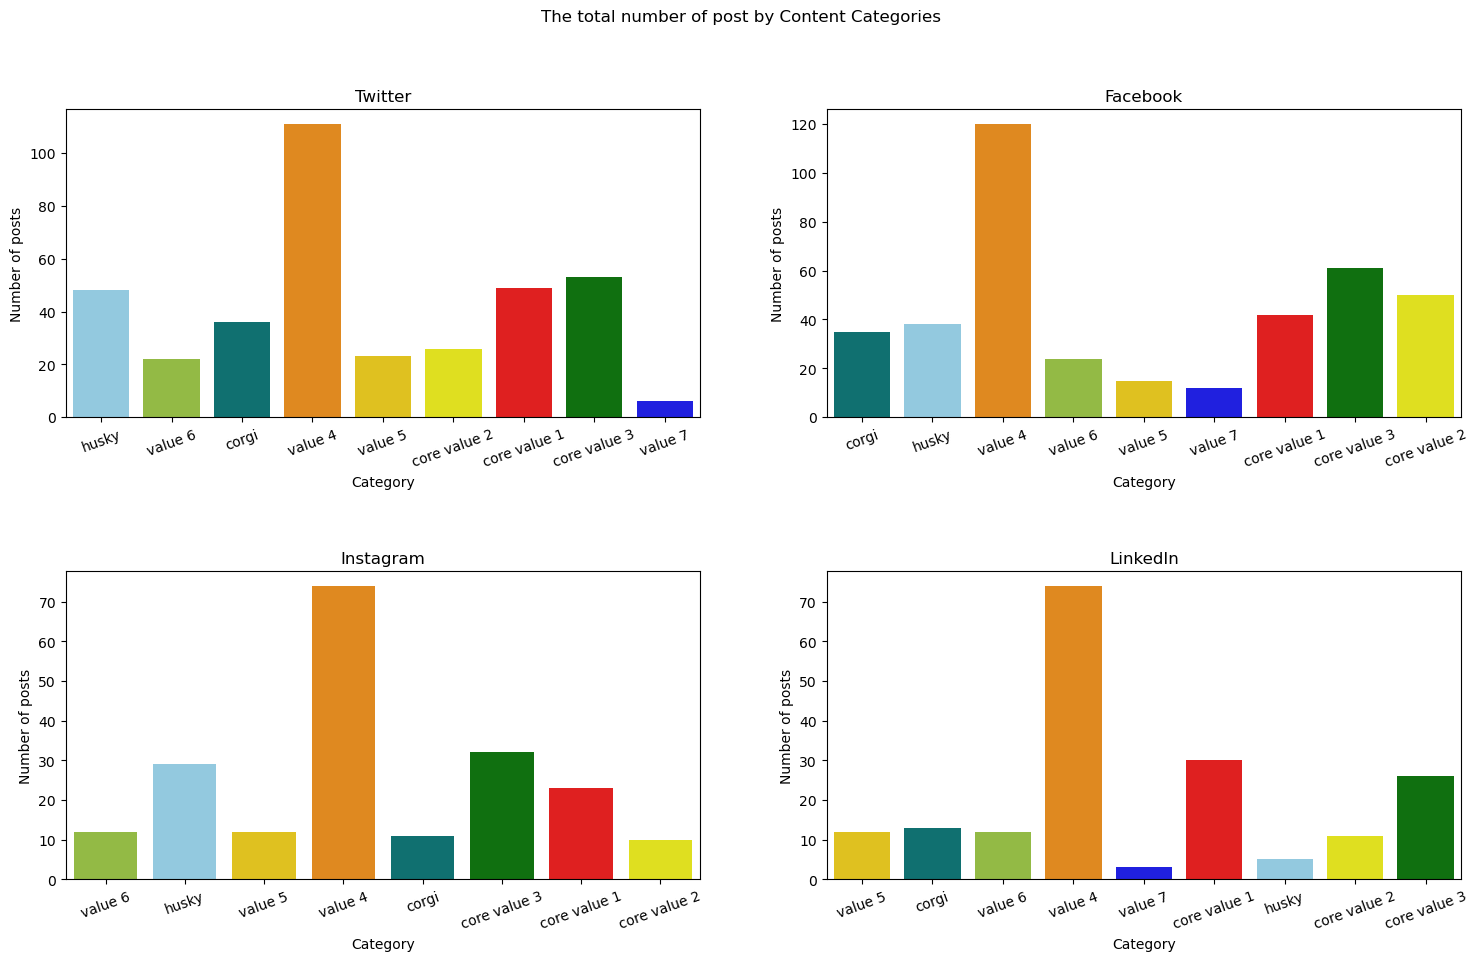

In [32]:
#the number of post

fig2, axes2 = plt.subplots(2,2, figsize = (18,10))

fig2.suptitle('The total number of post by Content Categories')
fig2.subplots_adjust(hspace=0.5)

#wtitter
g = sns.barplot(ax= axes2[0,0], data=twitter_primary, x= 'Category', y = 'Number of posts', palette=twitter_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes2[0,0].set_title('Twitter')

#Facebook
g = sns.barplot(ax= axes2[0,1], data=facebook_primary, x= 'Category', y = 'Number of posts', palette=facebook_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes2[0,1].set_title('Facebook')

#Instagram
g = sns.barplot(ax= axes2[1,0], data=instagram_primary, x= 'Category', y = 'Number of posts',palette=instagram_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes2[1,0].set_title('Instagram')


#LinkedIn
g = sns.barplot(ax= axes2[1,1], data=linkedin_primary, x= 'Category', y = 'Number of posts',palette=linkedin_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes2[1,1].set_title('LinkedIn');



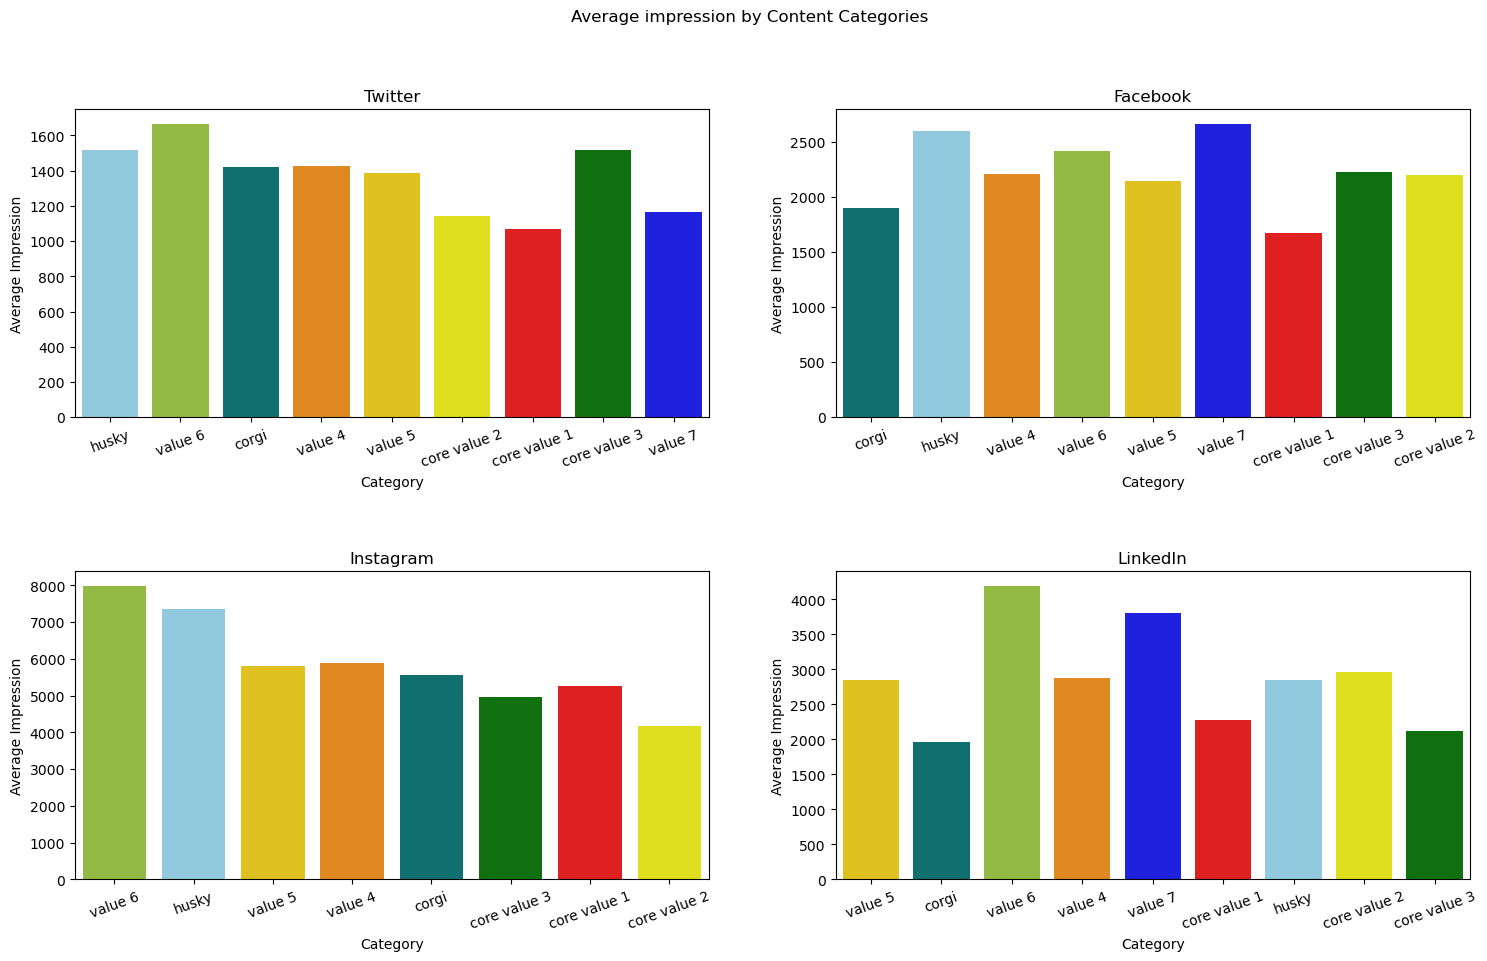

In [33]:
#Median impression

fig3, axes3 = plt.subplots(2,2, figsize = (18,10))

fig3.suptitle('Average impression by Content Categories')
fig3.subplots_adjust(hspace=0.5)

g = sns.barplot(ax= axes3[0,0], data=twitter_primary, x= 'Category', y = 'Average Impression', palette=twitter_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes3[0,0].set_title('Twitter')


#Facebook
g = sns.barplot(ax= axes3[0,1], data=facebook_primary, x= 'Category', y = 'Average Impression', palette=facebook_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes3[0,1].set_title('Facebook')

#Instagram
g = sns.barplot(ax= axes3[1,0], data=instagram_primary, x= 'Category', y = 'Average Impression',palette=instagram_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes3[1,0].set_title('Instagram')

#LinkedIn
g = sns.barplot(ax= axes3[1,1], data=linkedin_primary, x= 'Category', y = 'Average Impression',palette=linkedin_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes3[1,1].set_title('LinkedIn');


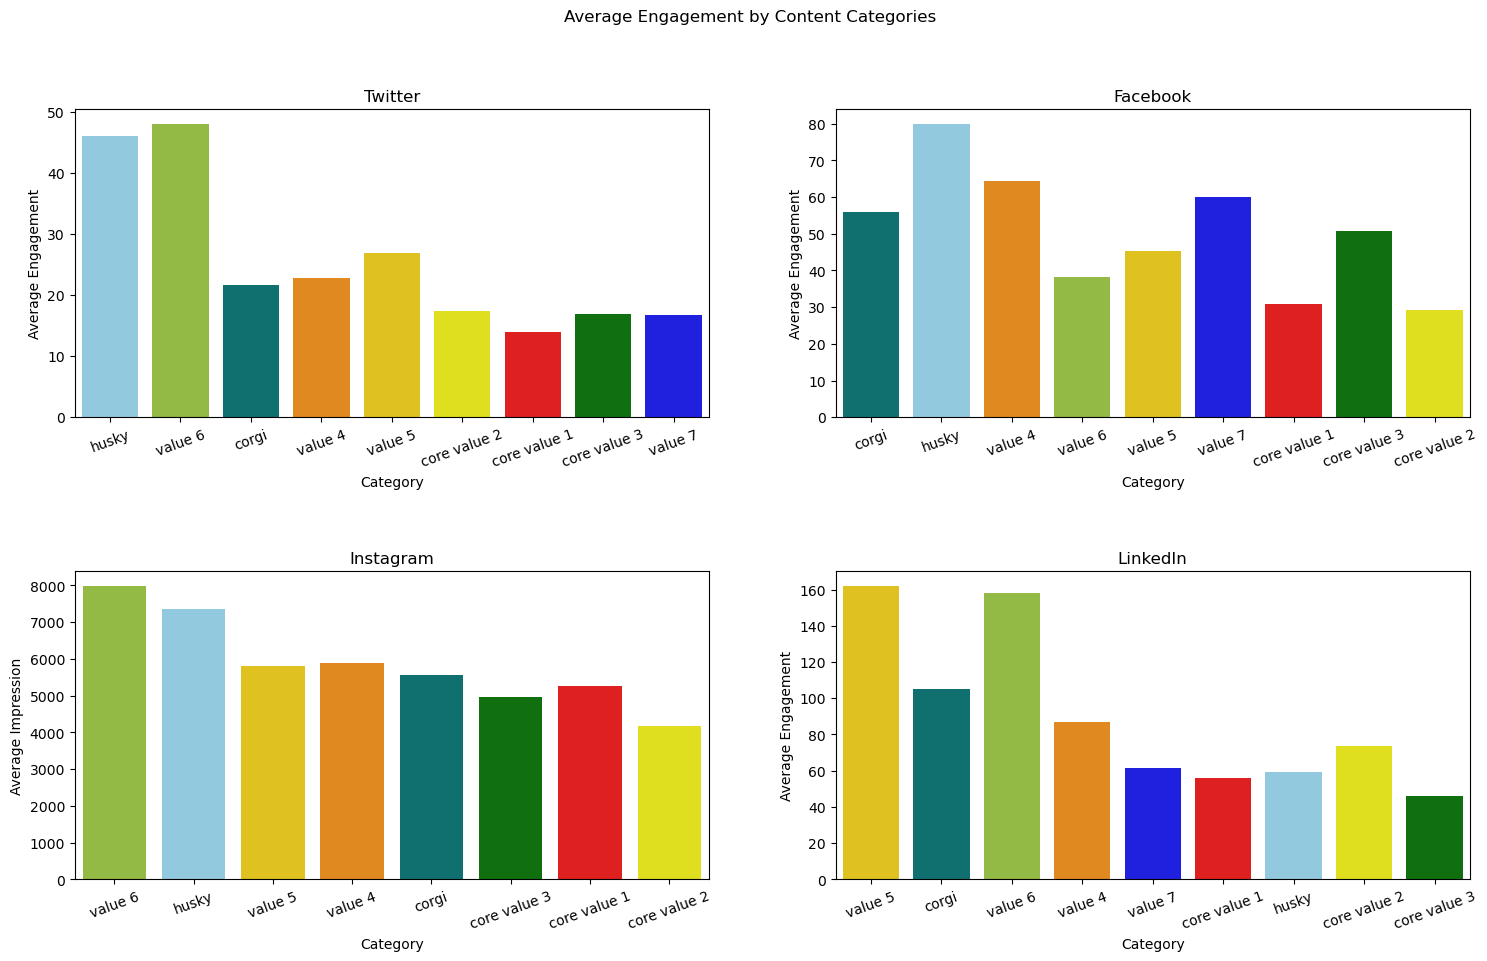

In [34]:
#Median engagement

fig4, axes4 = plt.subplots(2,2, figsize = (18,10))

fig4.suptitle('Average Engagement by Content Categories')
fig4.subplots_adjust(hspace=0.5)


g = sns.barplot(ax= axes4[0,0], data=twitter_primary, x= 'Category', y = 'Average Engagement', palette=twitter_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes4[0,0].set_title('Twitter')


#Facebook
g = sns.barplot(ax= axes4[0,1], data=facebook_primary, x= 'Category', y = 'Average Engagement', palette=facebook_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes4[0,1].set_title('Facebook')

#Instagram
g = sns.barplot(ax= axes4[1,0], data=instagram_primary, x= 'Category', y = 'Average Impression',palette=instagram_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes4[1,0].set_title('Instagram')

#LinkedIn
g = sns.barplot(ax= axes4[1,1], data=linkedin_primary, x= 'Category', y = 'Average Engagement',palette=linkedin_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes4[1,1].set_title('LinkedIn');

### Twitter

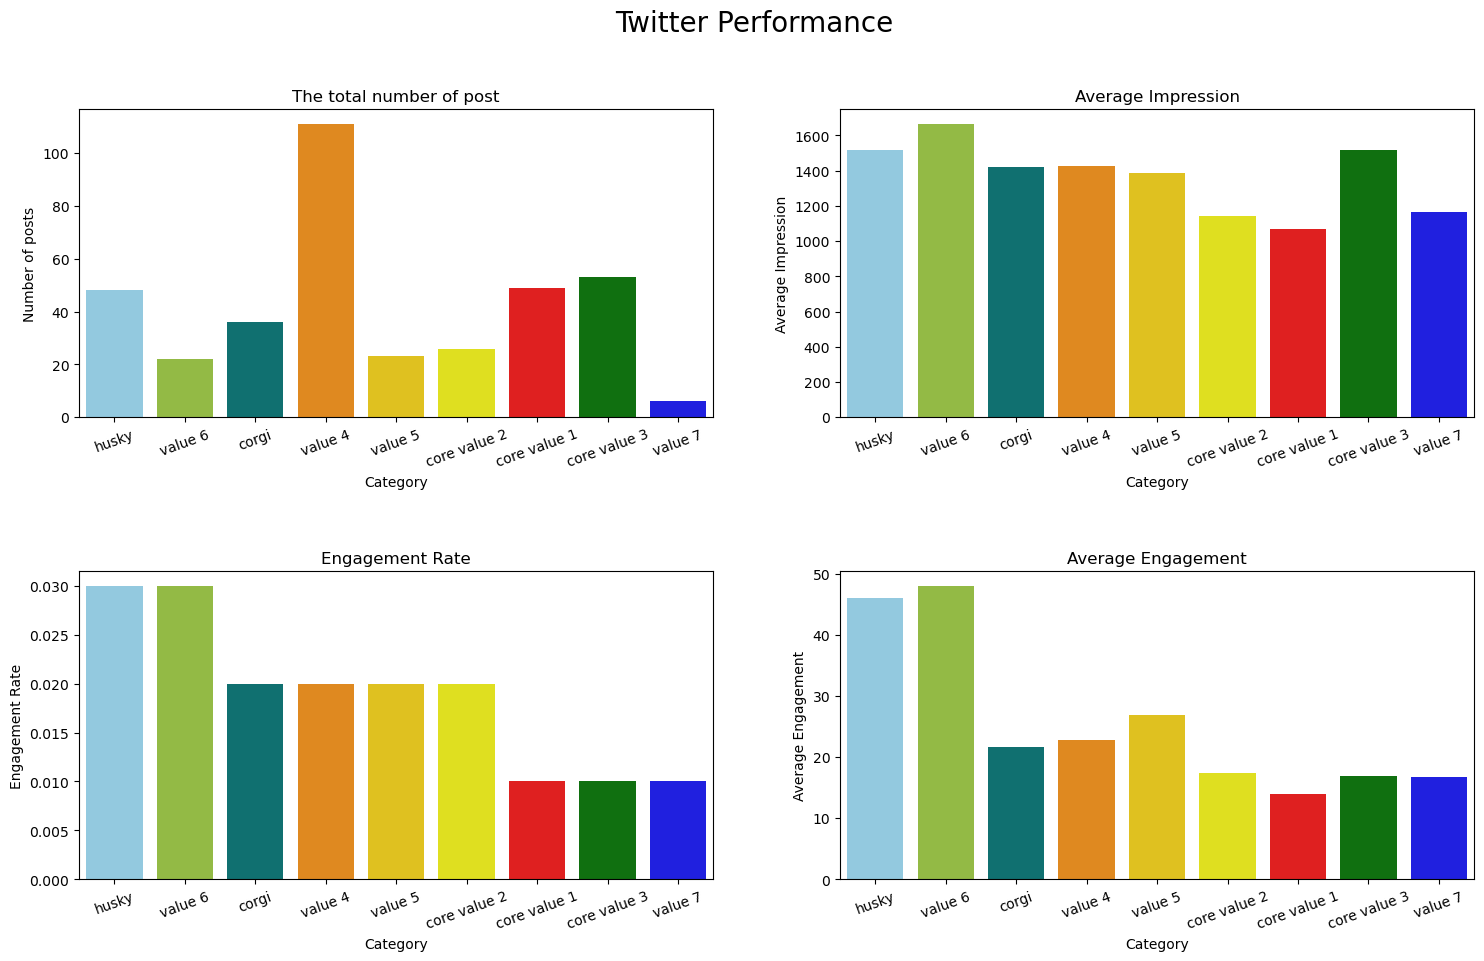

In [35]:
fig, axes_t = plt.subplots(2,2, figsize = (18,10))

fig.suptitle('Twitter Performance', fontsize=20)
fig.subplots_adjust(hspace=0.5)


#Number of post
g = sns.barplot(ax= axes_t[0,0], data=twitter_primary, x= 'Category', y = 'Number of posts',palette=twitter_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_t[0,0].set_title('The total number of post')

#Average Impression
g = sns.barplot(ax= axes_t[0,1], data=twitter_primary, x= 'Category', y = 'Average Impression',palette=twitter_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_t[0,1].set_title('Average Impression')


#Engagement rate
g = sns.barplot(ax= axes_t[1,0], data=twitter_primary, x= 'Category', y = 'Engagement Rate', palette=twitter_primary['color'],order=twitter_primary.sort_values('Engagement Rate', ascending=False).Category)
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_t[1,0].set_title('Engagement Rate')


#Average Engagement
g = sns.barplot(ax= axes_t[1,1], data=twitter_primary, x= 'Category', y = 'Average Engagement', palette=twitter_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_t[1,1].set_title('Average Engagement');



## Facebook

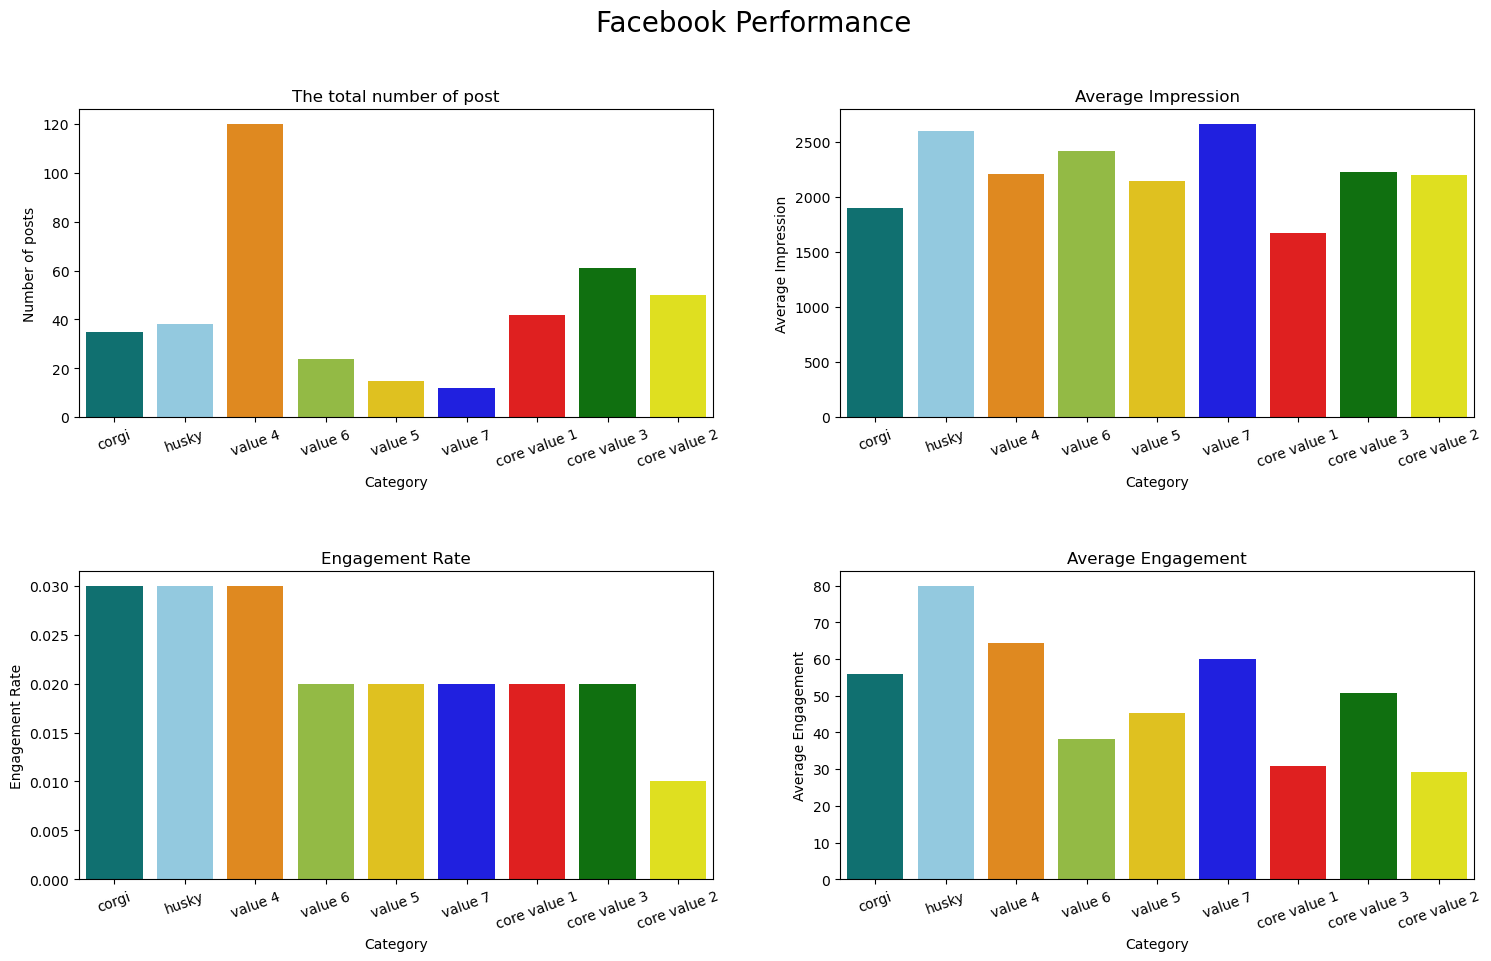

In [36]:
fig, axes_f = plt.subplots(2,2, figsize = (18,10))

fig.suptitle('Facebook Performance', fontsize=20)
fig.subplots_adjust(hspace=0.5)


#Number of post
g = sns.barplot(ax= axes_f[0,0], data=facebook_primary, x= 'Category', y = 'Number of posts',palette=facebook_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_f[0,0].set_title('The total number of post')

#Average Impression
g = sns.barplot(ax= axes_f[0,1], data=facebook_primary, x= 'Category', y = 'Average Impression',palette=facebook_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_f[0,1].set_title('Average Impression')


#Engagement rate
g = sns.barplot(ax= axes_f[1,0], data=facebook_primary, x= 'Category', y = 'Engagement Rate', palette=facebook_primary['color'],order=facebook_primary.sort_values('Engagement Rate', ascending=False).Category)
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_f[1,0].set_title('Engagement Rate')


#Average Engagement
g = sns.barplot(ax= axes_f[1,1], data=facebook_primary, x= 'Category', y = 'Average Engagement', palette=facebook_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_f[1,1].set_title('Average Engagement');


## Instagram

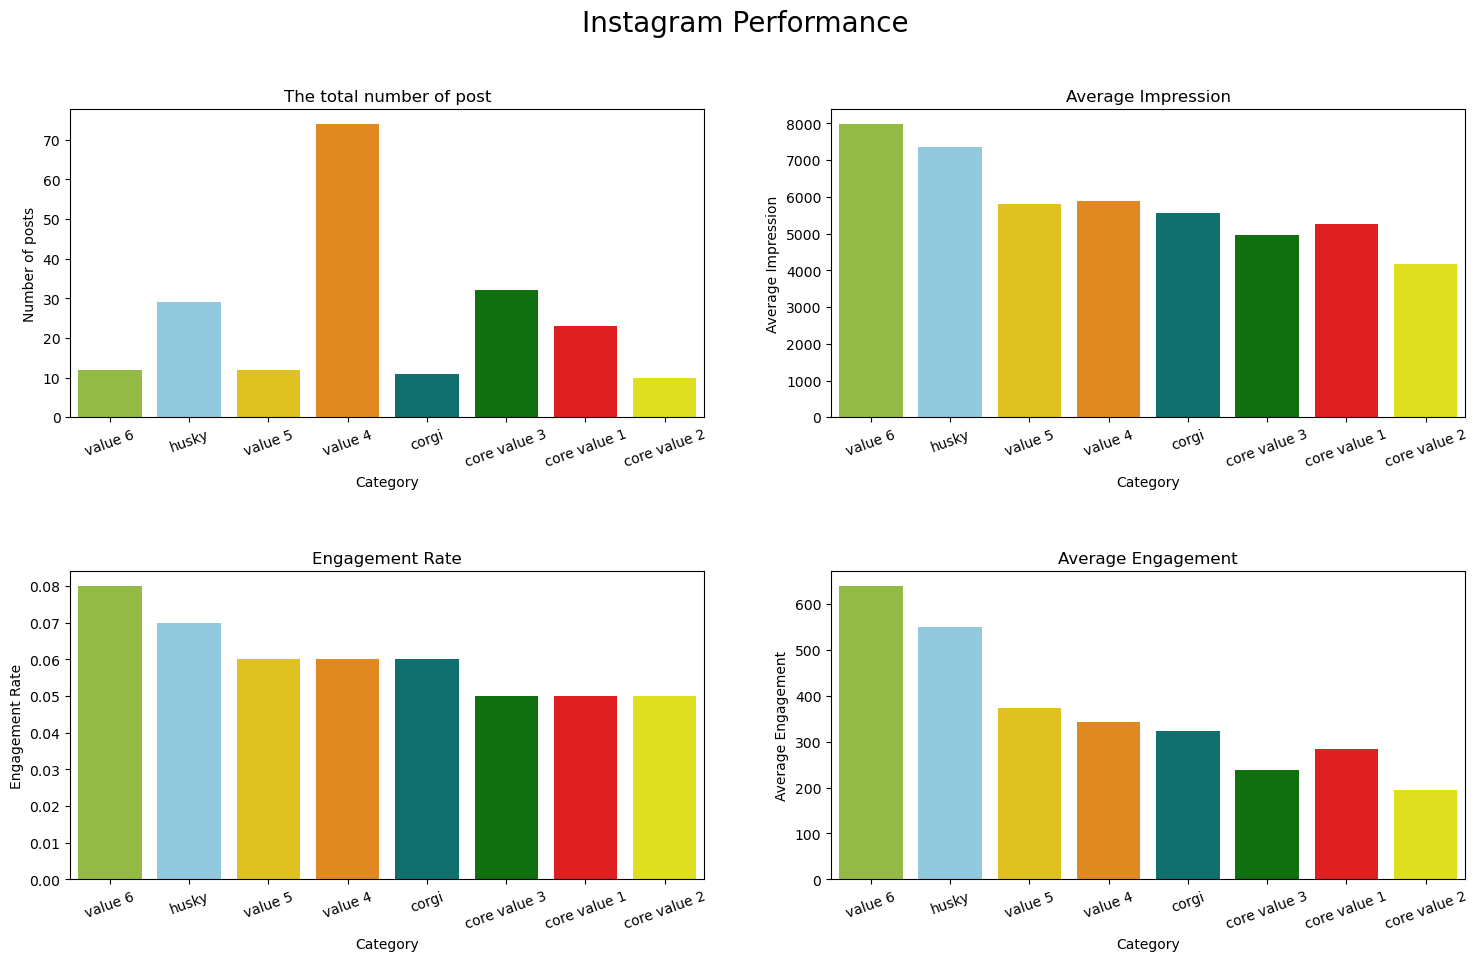

In [37]:
fig, axes_i = plt.subplots(2,2, figsize = (18,10))

fig.suptitle('Instagram Performance', fontsize=20)
fig.subplots_adjust(hspace=0.5)


#Number of post
g = sns.barplot(ax= axes_i[0,0], data=instagram_primary, x= 'Category', y = 'Number of posts',palette=instagram_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_i[0,0].set_title('The total number of post')

#Average Impression
g = sns.barplot(ax= axes_i[0,1], data=instagram_primary, x= 'Category', y = 'Average Impression',palette=instagram_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_i[0,1].set_title('Average Impression')


#Engagement rate
g = sns.barplot(ax= axes_i[1,0], data=instagram_primary, x= 'Category', y = 'Engagement Rate', palette=instagram_primary['color'],order=instagram_primary.sort_values('Engagement Rate', ascending=False).Category)
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_i[1,0].set_title('Engagement Rate')


#Average Engagement
g = sns.barplot(ax= axes_i[1,1], data=instagram_primary, x= 'Category', y = 'Average Engagement', palette=instagram_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_i[1,1].set_title('Average Engagement');


## LinkedIn

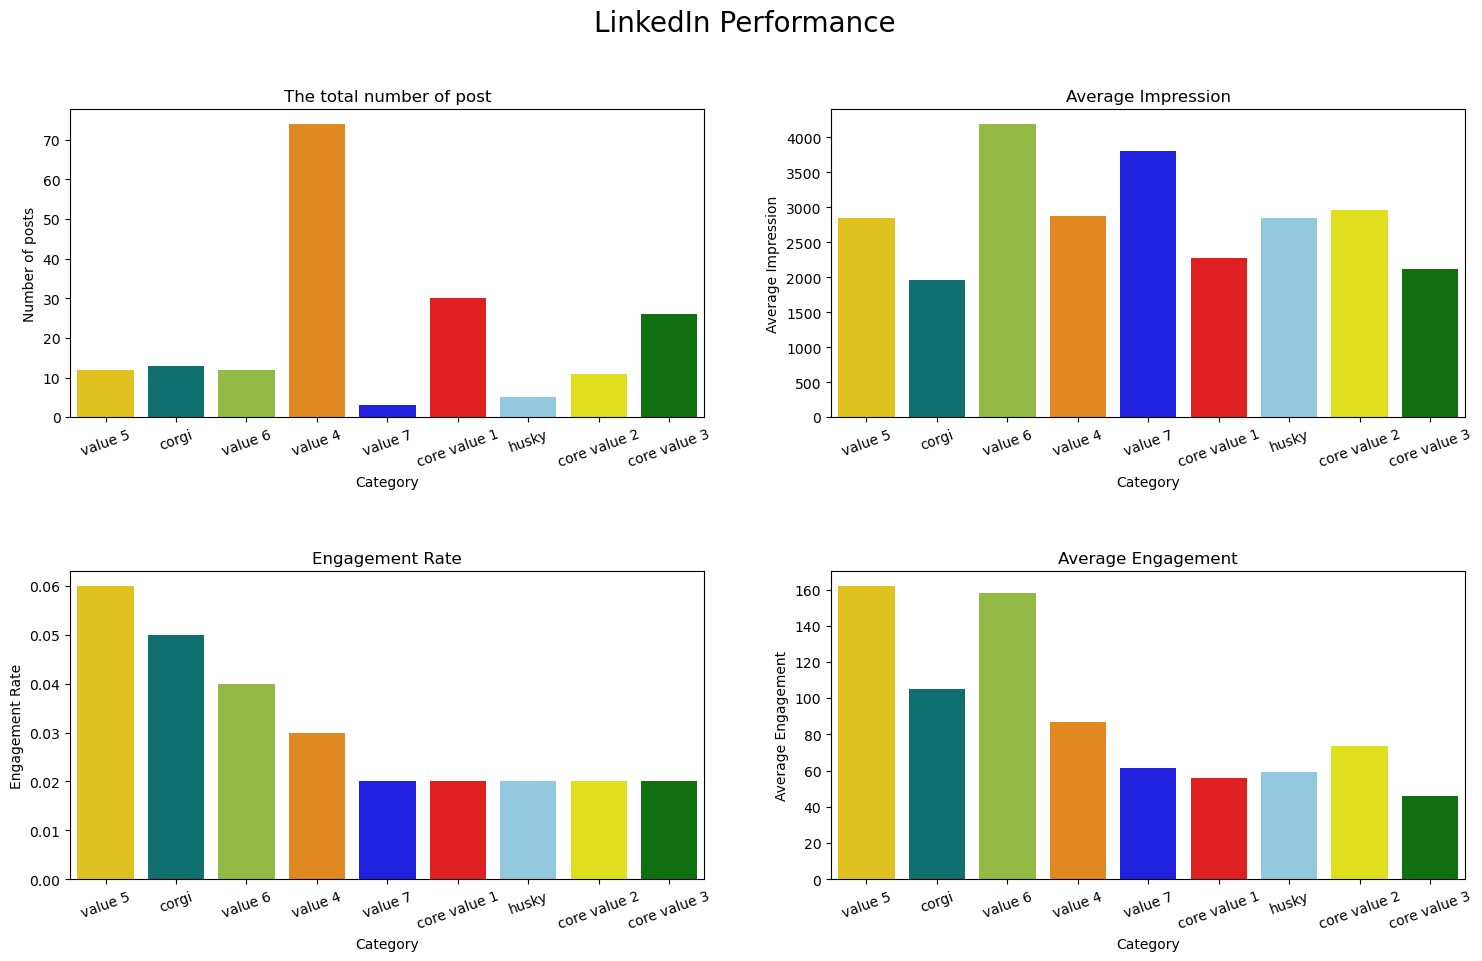

In [38]:
fig, axes_l = plt.subplots(2,2, figsize = (18,10))

fig.suptitle('LinkedIn Performance', fontsize=20)
fig.subplots_adjust(hspace=0.5)


#Number of post
g = sns.barplot(ax= axes_l[0,0], data=linkedin_primary, x= 'Category', y = 'Number of posts',palette=linkedin_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_l[0,0].set_title('The total number of post')

#Average Impression
g = sns.barplot(ax= axes_l[0,1], data=linkedin_primary, x= 'Category', y = 'Average Impression',palette=linkedin_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_l[0,1].set_title('Average Impression')


#Engagement rate
g = sns.barplot(ax= axes_l[1,0], data=linkedin_primary, x= 'Category', y = 'Engagement Rate', palette=linkedin_primary['color'],order=linkedin_primary.sort_values('Engagement Rate', ascending=False).Category)
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_l[1,0].set_title('Engagement Rate')


#Average Engagement
g = sns.barplot(ax= axes_l[1,1], data=linkedin_primary, x= 'Category', y = 'Average Engagement', palette=linkedin_primary['color'])
g.set_xticklabels(g.get_xticklabels(),rotation=20)
axes_l[1,1].set_title('Average Engagement');
